In [1]:
%%time
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("afmhot")

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth":1.5})
sns.set_style("whitegrid")
import pylab
pylab.rcParams['figure.figsize'] = (15, 8)
plt.style.use('dark_background')


import tensorflow as tf
print("# GPUs: ", len(tf.config.experimental.list_physical_devices("GPU")))
import numpy as np
import tensorflow.keras as tfk
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Dense, Activation, Dropout, Input, InputLayer
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix, roc_auc_score,roc_curve


# GPUs:  1
CPU times: total: 7.03 s
Wall time: 14.1 s


In [4]:
df = pd.read_csv("data/customer_churn.csv")
df = df.drop('customerID',axis=1)

In [5]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.shape

(7043, 20)

In [35]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [36]:
df.Churn.value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [37]:
error_count = 0
errors=[]
for x in df['TotalCharges']:
    try: 
        
        if isinstance(float(x),float):
            pass
    except:
        errors.append(x)
        error_count+=1

display(error_count)

display(errors)

11

[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']

In [38]:
df['TotalCharges'] = df['TotalCharges'].replace(" ",np.NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [39]:
impute_index = df[df['TotalCharges'].isna()].index
impute_index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [40]:
y = df.Churn.apply(lambda x : 1 if x == 'Yes' else 0)
# y=df[target]

target = 'Churn'
X = df.loc[:, df.columns != target]

In [41]:
X.dtypes.value_counts()

object     15
int64       2
float64     2
dtype: int64

In [42]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [43]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler

In [44]:
# train_test_split(X,y,test_size=0.30,random_state=415)

In [61]:
def XC1(X):
    ct = make_column_transformer(
    (OneHotEncoder(), list(X.select_dtypes("object").columns)),
    (KNNImputer(n_neighbors=20), ["TotalCharges"])
    ,remainder='passthrough')
    return pd.DataFrame(ct.fit_transform(X))
    

In [62]:
# X_ct = pd.DataFrame(XC1(X))

In [63]:
X_ct = XC1(X)

In [64]:
X_ct

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,29.85,0.0,1.0,29.85
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1889.50,0.0,34.0,56.95
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,108.15,0.0,2.0,53.85
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1840.75,0.0,45.0,42.30
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,151.65,0.0,2.0,70.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1990.50,0.0,24.0,84.80
7039,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,7362.90,0.0,72.0,103.20
7040,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,346.45,0.0,11.0,29.60
7041,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,306.60,1.0,4.0,74.40


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_ct, y.values, test_size=0.33, random_state=42)

In [52]:
type(X_ct)

numpy.ndarray

In [53]:
type(y.values)

numpy.ndarray

In [54]:
X_train

array([[ 0.  ,  1.  ,  0.  , ...,  0.  , 40.  , 74.55],
       [ 0.  ,  1.  ,  1.  , ...,  0.  , 10.  , 29.5 ],
       [ 1.  ,  0.  ,  1.  , ...,  0.  , 27.  , 19.15],
       ...,
       [ 0.  ,  1.  ,  0.  , ...,  0.  , 12.  , 21.15],
       [ 0.  ,  1.  ,  1.  , ...,  1.  , 12.  , 99.45],
       [ 0.  ,  1.  ,  1.  , ...,  0.  , 26.  , 19.8 ]])

In [55]:
type(X_train)

numpy.ndarray

In [56]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,3015.75,0.0,40.0,74.55
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,255.25,0.0,10.0,29.50
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,501.35,0.0,27.0,19.15
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,582.50,0.0,7.0,86.50
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1715.10,0.0,65.0,24.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4713,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,95.00,0.0,1.0,95.00
4714,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,2198.30,0.0,23.0,91.10
4715,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,306.05,0.0,12.0,21.15
4716,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1200.15,1.0,12.0,99.45


In [68]:
4130/1495

2.762541806020067

In [69]:
4130-2990

1140

In [70]:
1495- 2990

-1495

# <font color = 'salmon'> Ensemble </font>

In [67]:
pd.concat([X_ct,y],axis=1)

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,Churn
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,29.85,0.0,1.0,29.85,0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1889.50,0.0,34.0,56.95,0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,108.15,0.0,2.0,53.85,1
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1840.75,0.0,45.0,42.30,0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,151.65,0.0,2.0,70.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1990.50,0.0,24.0,84.80,0
7039,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,7362.90,0.0,72.0,103.20,0
7040,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,346.45,0.0,11.0,29.60,0
7041,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,306.60,1.0,4.0,74.40,1


In [28]:
X

array([[  1.  ,   0.  ,   0.  , ...,   0.  ,   1.  ,  29.85],
       [  0.  ,   1.  ,   1.  , ...,   0.  ,  34.  ,  56.95],
       [  0.  ,   1.  ,   1.  , ...,   0.  ,   2.  ,  53.85],
       ...,
       [  1.  ,   0.  ,   0.  , ...,   0.  ,  11.  ,  29.6 ],
       [  0.  ,   1.  ,   0.  , ...,   1.  ,   4.  ,  74.4 ],
       [  0.  ,   1.  ,   1.  , ...,   0.  ,  66.  , 105.65]])

In [31]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [43]:
# X_train, X_test, y_train, y_test = X_train_smote, X_test_smote, y_train_smote, y_test_smote

In [83]:

#https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [84]:
%%time
model = Sequential()

model.add(Dense(90,input_shape=(X_train_smote.shape[1],), activation='relu')) #shape: 46
model.add(Dropout(0.33))
model.add(Dense(45, activation='relu'))
model.add(Dropout(0.33))
model.add(Dense(45, activation='relu'))
model.add(Dropout(0.33))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['acc',f1_m,recall_m, precision_m])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 90)                4140      
                                                                 
 dropout_3 (Dropout)         (None, 90)                0         
                                                                 
 dense_5 (Dense)             (None, 45)                4095      
                                                                 
 dropout_4 (Dropout)         (None, 45)                0         
                                                                 
 dense_6 (Dense)             (None, 45)                2070      
                                                                 
 dropout_5 (Dropout)         (None, 45)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [114]:
%%time
history = model.fit(X_train_smote, y_train_smote, validation_data=[X_test_smote, y_test_smote],verbose=1,epochs=250,batch_size=2**6)

Epoch 1/250
109/109 [==============================] - 1s 7ms/step - loss: 0.6036 - acc: 0.6923 - f1_m: 0.6476 - recall_m: 0.5801 - precision_m: 0.7493 - val_loss: 0.5868 - val_acc: 0.7095 - val_f1_m: 0.6143 - val_recall_m: 0.5488 - val_precision_m: 0.7371
Epoch 2/250
109/109 [==============================] - 1s 7ms/step - loss: 0.6040 - acc: 0.6911 - f1_m: 0.6363 - recall_m: 0.5515 - precision_m: 0.7668 - val_loss: 0.5716 - val_acc: 0.7328 - val_f1_m: 0.6599 - val_recall_m: 0.6484 - val_precision_m: 0.7128
Epoch 3/250
109/109 [==============================] - 1s 7ms/step - loss: 0.5979 - acc: 0.7006 - f1_m: 0.6644 - recall_m: 0.6018 - precision_m: 0.7521 - val_loss: 0.5987 - val_acc: 0.7180 - val_f1_m: 0.6270 - val_recall_m: 0.5594 - val_precision_m: 0.7503
Epoch 4/250
109/109 [==============================] - 1s 7ms/step - loss: 0.5971 - acc: 0.7003 - f1_m: 0.6586 - recall_m: 0.5906 - precision_m: 0.7581 - val_loss: 0.5750 - val_acc: 0.7260 - val_f1_m: 0.6465 - val_recall_m: 0.612

In [115]:
hist = pd.DataFrame(history.history)
hist.columns

Index(['loss', 'acc', 'f1_m', 'recall_m', 'precision_m', 'val_loss', 'val_acc',
       'val_f1_m', 'val_recall_m', 'val_precision_m'],
      dtype='object')

In [116]:
def plotter(v):
    """pass a dataframe with metric columns"""
    v.plot(color=['chartreuse','hotpink'],linewidth=3.5,marker='',markersize=25)
    plt.title(" & ".join(list(v.columns)), size=43,color='slateblue')
    plt.show();

In [117]:
model.metrics_names

['loss', 'acc', 'f1_m', 'recall_m', 'precision_m']

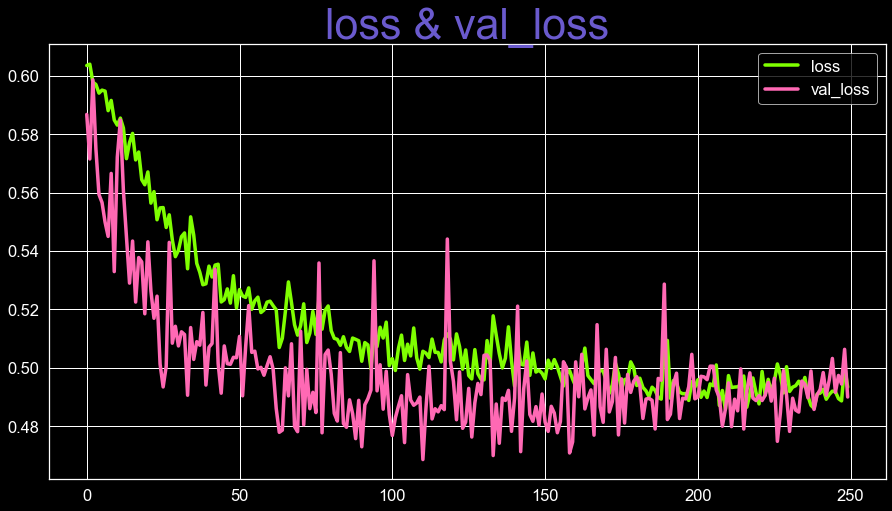

In [118]:
plotter(hist[['loss','val_loss']])

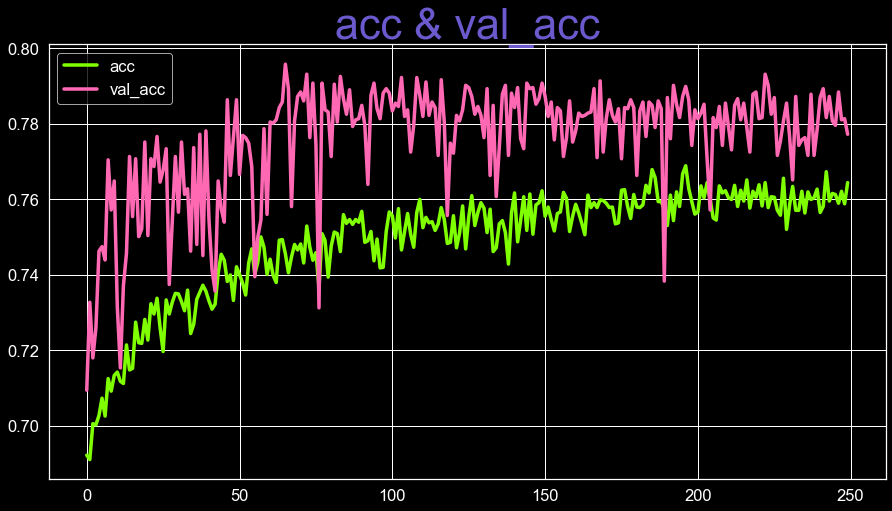

In [119]:
plotter(hist[['acc','val_acc']])

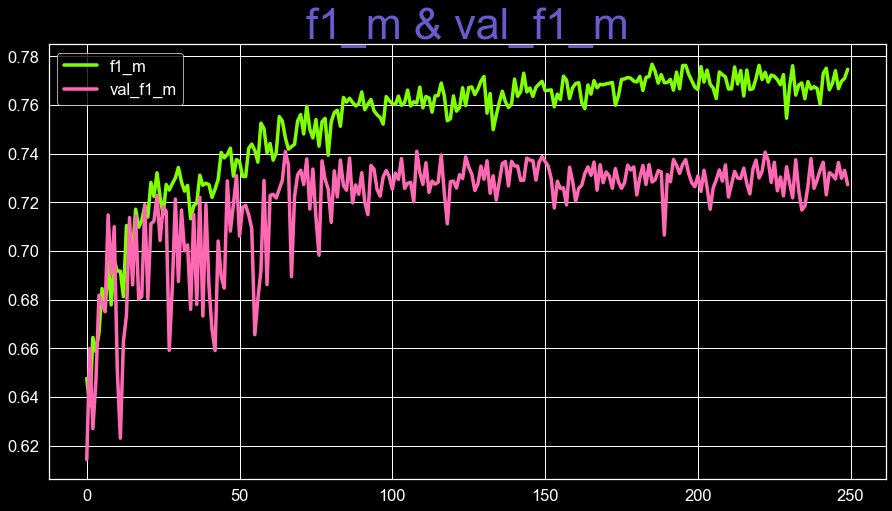

In [120]:
plotter(hist[['f1_m','val_f1_m']])

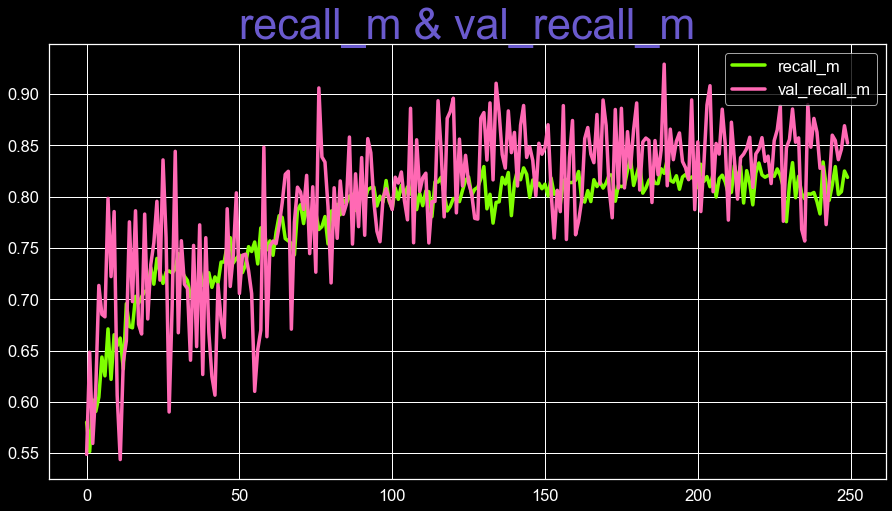

In [121]:
plotter(hist[['recall_m','val_recall_m']])

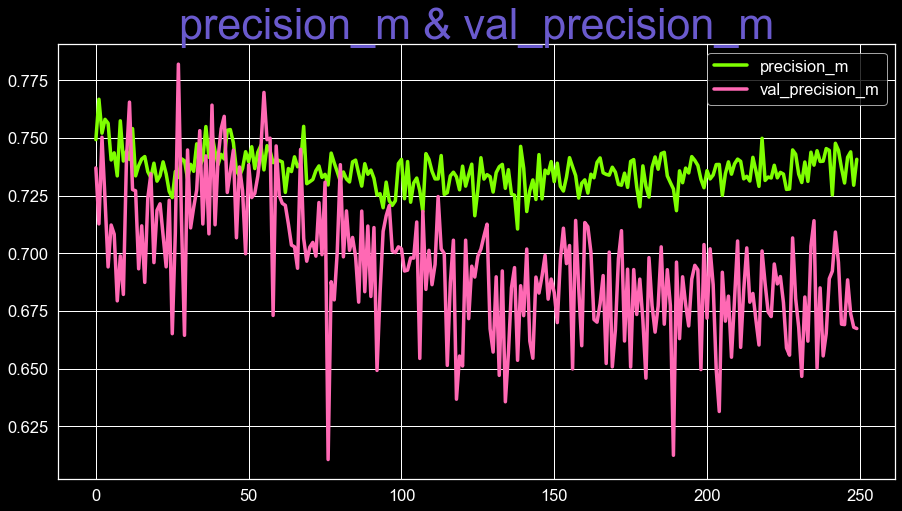

In [122]:
plotter(hist[['precision_m',"val_precision_m"]])

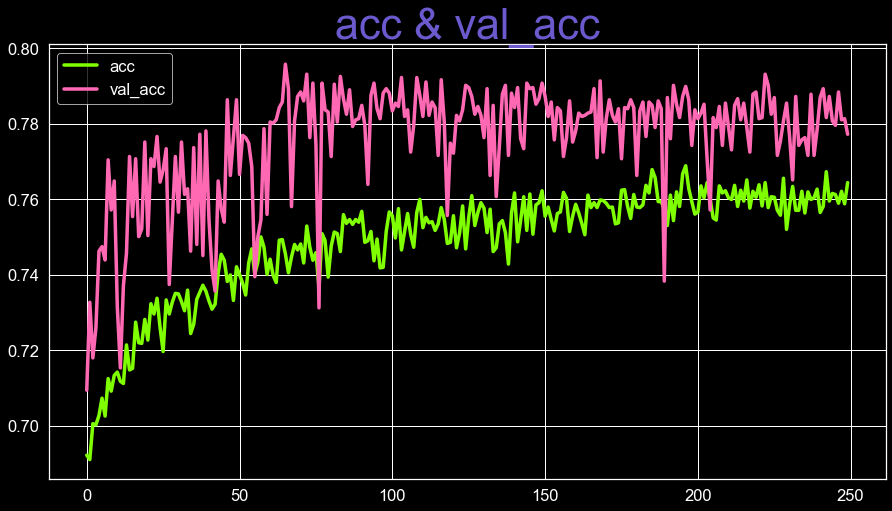

In [123]:
plotter(hist[['acc','val_acc']])

In [124]:
test = hist[['loss','val_loss']].columns
test

Index(['loss', 'val_loss'], dtype='object')

In [125]:
test2= list(test)
' & '.join(test2)

'loss & val_loss'

In [126]:
" & ".join(list(hist[['loss','val_loss']].columns))

'loss & val_loss'

<AxesSubplot:>

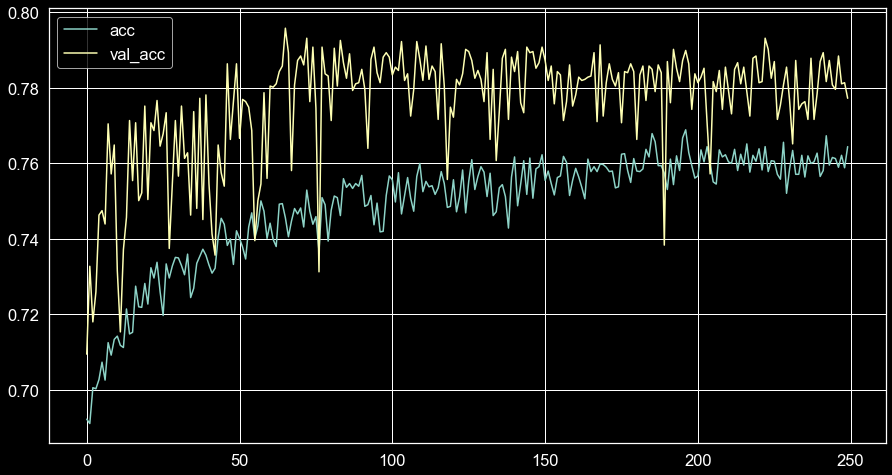

In [128]:
hist[['acc','val_acc']].plot()

<AxesSubplot:>

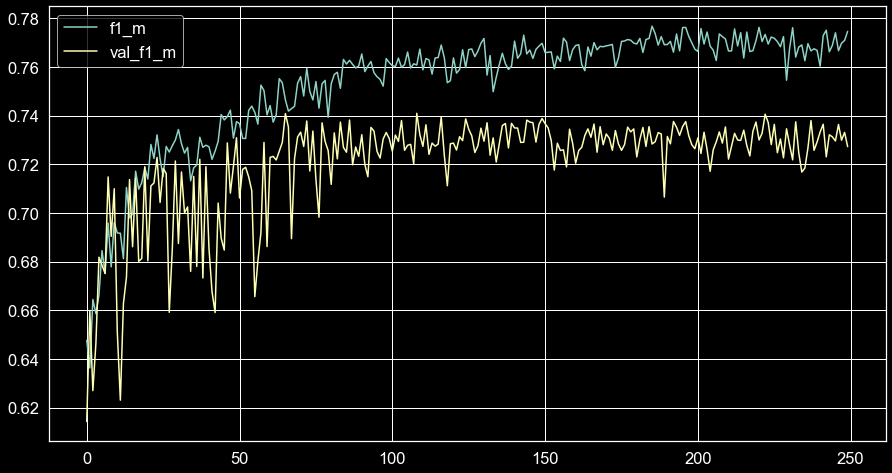

In [129]:
hist[['f1_m','val_f1_m']].plot()

<AxesSubplot:>

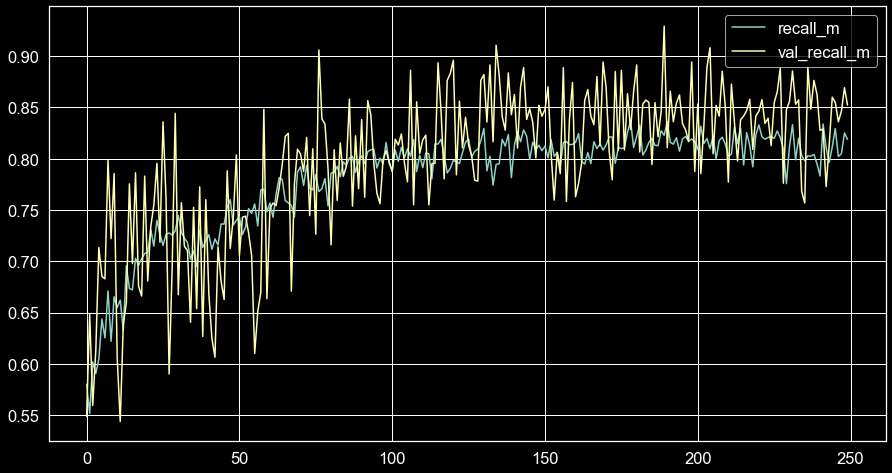

In [130]:
hist[['recall_m','val_recall_m']].plot()

In [131]:
%%time
model.evaluate(X_test_smote,y_test_smote)

107/107 [==============================] - 0s 4ms/step - loss: 0.4900 - acc: 0.7773 - f1_m: 0.7221 - recall_m: 0.8518 - precision_m: 0.6647
CPU times: total: 594 ms
Wall time: 461 ms


[0.4900202751159668,
 0.7772539854049683,
 0.7220723032951355,
 0.8518032431602478,
 0.6647067666053772]

In [132]:
print(classification_report(y_test_smote, model.predict(X_test_smote) >= 0.50))

              precision    recall  f1-score   support

           0       0.83      0.69      0.76      1697
           1       0.74      0.86      0.79      1697

    accuracy                           0.78      3394
   macro avg       0.79      0.78      0.78      3394
weighted avg       0.79      0.78      0.78      3394



In [133]:
roc_auc_score(y_test_smote,model.predict(X_test_smote))

0.8628447233826966

In [ ]:
# # Get the ROC-AUC score
# predictions_proba = grid_rf_class.best_estimator_.predict_proba(X_test)[:,1]
# print("ROC-AUC Score \n", roc_auc_score(y_test, predictions_proba))

In [ ]:
# # Get the ROC-AUC score
# predictions_proba = grid_rf_class.best_estimator_.predict_proba(X_test)[:,1]
# print("ROC-AUC Score \n", roc_auc_score(y_test, predictions_proba))

# model.summary()